In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult_data = pd.read_csv("adult.data")
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
adult_data.columns =["age","work_class","fnlwgt","education_level","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]
adult_data.tail()

,age,work_class,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
n_records = len(adult_data.index)

n_greater_50k = len(adult_data[adult_data.salary == ' >50K'])

n_at_most_50k = len(adult_data[adult_data.salary == ' <=50K'])

greater_percent = n_greater_50k * 100.0 / n_records

print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32560
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24719
Percentage of individuals making more than $50,000: 24.08%


In [5]:
outcomes = adult_data['salary']
data = adult_data.drop('salary', axis = 1)

In [6]:
outcomes.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [7]:
data.head()

,age,work_class,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [8]:
def distribution(data, transformed = False):
    fig = plt.figure(figsize = (11,5));

    for i, feature in enumerate(['capital_gain','capital_loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000', '#00000A']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(4):

                # Creative plot code
                ax[j/4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j/4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j/4, j%4].set_xlabel("Training Set Size")
                ax[j/4, j%4].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

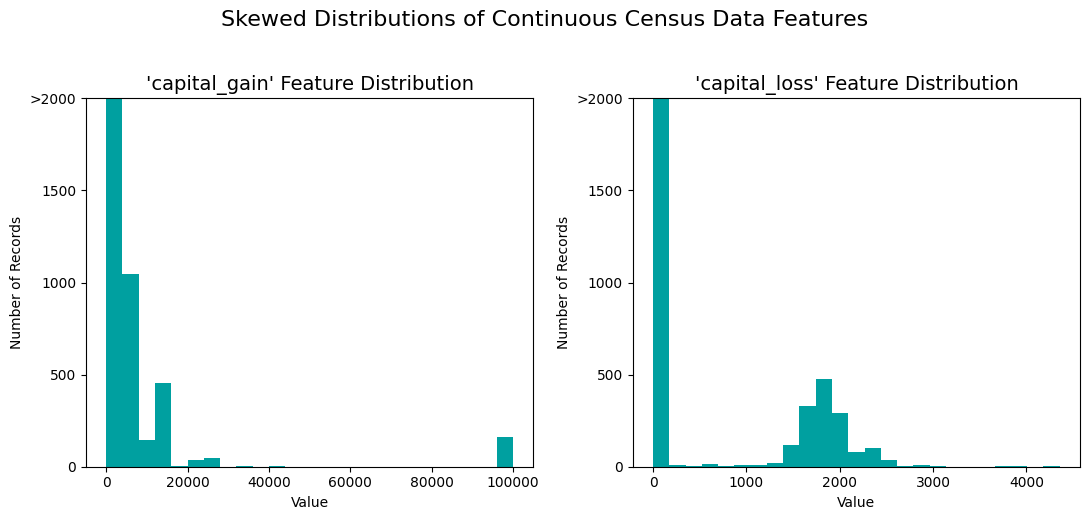

In [9]:
distribution(data)

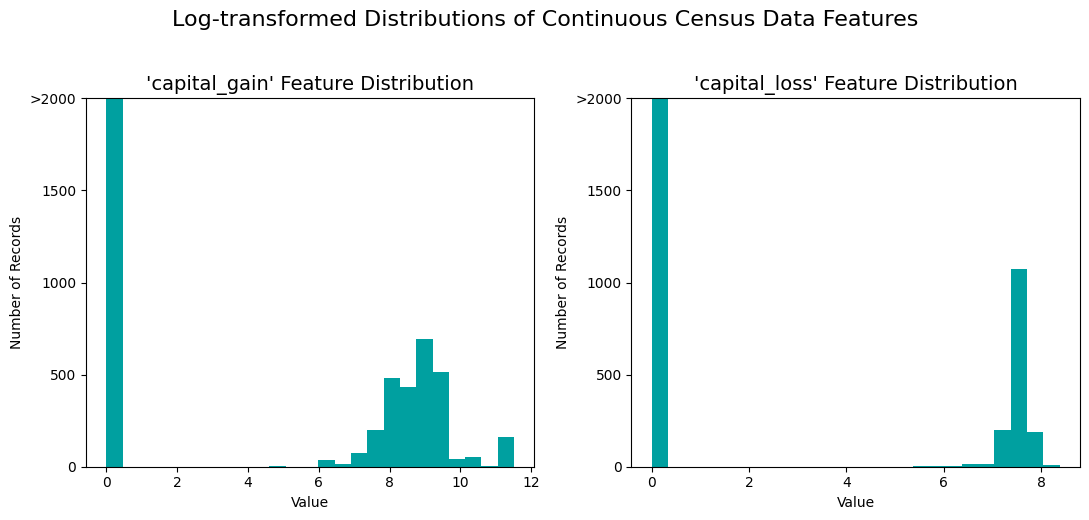

In [10]:
skewed = ['capital_gain', 'capital_loss']
features_log_transformed = pd.DataFrame(data)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

distribution(features_log_transformed, transformed = True)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))


,age,work_class,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States
1,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States
2,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States
3,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba
4,0.273973,Private,284582,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States


In [12]:
features_final = pd.get_dummies(features_log_minmax_transform)

incomes = outcomes.map({' <=50K': 0, ' >50K': 1})

encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

108 total features after one-hot encoding.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    incomes,
                                                    test_size = 0.2,
                                                    random_state = 0)

print( "Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 26048 samples.
Testing set has 6512 samples.


In [14]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}

    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()

    results['train_time'] = end - start

    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()

    results['pred_time'] = end - start

    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    results['acc_test'] = accuracy_score(y_test,predictions_test)

    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)

    results['f_test'] = fbeta_score(y_test,predictions_test, beta=0.5)

    print( "{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    return results

In [15]:
TP = n_greater_50k
FP = n_at_most_50k
TN = 0
FN = 0
accuracy = float(TN+TP)/(TP+FP)
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

In [16]:
from sklearn.svm import LinearSVC as L_SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

clf_A = L_SVC()
clf_B = GNB()
clf_C = DT()
clf_D = SGD()
clf_E = RF()

samples_100 = len(X_train)
samples_10 = int(len(X_train)*0.1)
samples_1 = int(len(X_train)*0.01)

results = {}
for clf in [clf_A, clf_B, clf_C, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

results

LinearSVC trained on 260 samples.
LinearSVC trained on 2604 samples.
LinearSVC trained on 26048 samples.
GaussianNB trained on 260 samples.
GaussianNB trained on 2604 samples.
GaussianNB trained on 26048 samples.
DecisionTreeClassifier trained on 260 samples.
DecisionTreeClassifier trained on 2604 samples.
DecisionTreeClassifier trained on 26048 samples.
RandomForestClassifier trained on 260 samples.
RandomForestClassifier trained on 2604 samples.
RandomForestClassifier trained on 26048 samples.


{'LinearSVC': {0: {'train_time': 0.016520261764526367,
   'pred_time': 0.012772083282470703,
   'acc_train': 0.7566666666666667,
   'acc_test': 0.7612100737100738,
   'f_train': 0.0,
   'f_test': 0.0},
  1: {'train_time': 0.19931268692016602,
   'pred_time': 0.014379739761352539,
   'acc_train': 0.7566666666666667,
   'acc_test': 0.7612100737100738,
   'f_train': 0.0,
   'f_test': 0.0},
  2: {'train_time': 2.8400323390960693,
   'pred_time': 0.007917642593383789,
   'acc_train': 0.7566666666666667,
   'acc_test': 0.7612100737100738,
   'f_train': 0.0,
   'f_test': 0.0}},
 'GaussianNB': {0: {'train_time': 0.004523754119873047,
   'pred_time': 0.029947996139526367,
   'acc_train': 0.7566666666666667,
   'acc_test': 0.7612100737100738,
   'f_train': 0.0,
   'f_test': 0.0},
  1: {'train_time': 0.008020877838134766,
   'pred_time': 0.015408039093017578,
   'acc_train': 0.7566666666666667,
   'acc_test': 0.7612100737100738,
   'f_train': 0.0,
   'f_test': 0.0},
  2: {'train_time': 0.05808377